<a href="https://colab.research.google.com/github/akashtvkannur/Machine_Learning/blob/main/ML_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
df=pd.read_csv("/content/Car_Insurance_Claim[1].csv")
df

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,569520,65+,female,majority,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
1,750365,16-25,male,majority,0-9y,none,poverty,0.357757,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
2,199901,16-25,female,majority,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0
3,478866,16-25,male,majority,0-9y,university,working class,0.206013,1.0,before 2015,0.0,1.0,32765,11000.0,sedan,0,0,0,0.0
4,731664,26-39,male,majority,10-19y,none,working class,0.388366,1.0,before 2015,0.0,0.0,32765,12000.0,sedan,2,0,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,323164,26-39,female,majority,10-19y,university,upper class,0.582787,1.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,1,0.0
9996,910346,26-39,female,majority,10-19y,none,middle class,0.522231,1.0,after 2015,0.0,1.0,32765,NaN,sedan,1,0,0,0.0
9997,468409,26-39,male,majority,0-9y,high school,middle class,0.470940,1.0,before 2015,0.0,1.0,10238,14000.0,sedan,0,0,0,0.0
9998,903459,26-39,female,majority,10-19y,high school,poverty,0.364185,0.0,before 2015,0.0,1.0,10238,13000.0,sedan,2,0,1,1.0


In [ ]:
df.size

190000

In [ ]:
df.shape

(10000, 19)

In [ ]:
df.columns

Index(['ID', 'AGE', 'GENDER', 'RACE', 'DRIVING_EXPERIENCE', 'EDUCATION',
       'INCOME', 'CREDIT_SCORE', 'VEHICLE_OWNERSHIP', 'VEHICLE_YEAR',
       'MARRIED', 'CHILDREN', 'POSTAL_CODE', 'ANNUAL_MILEAGE', 'VEHICLE_TYPE',
       'SPEEDING_VIOLATIONS', 'DUIS', 'PAST_ACCIDENTS', 'OUTCOME'],
      dtype='object')

In [ ]:
df.describe

<bound method NDFrame.describe of           ID    AGE  GENDER      RACE DRIVING_EXPERIENCE    EDUCATION  \
0     569520    65+  female  majority               0-9y  high school   
1     750365  16-25    male  majority               0-9y         none   
2     199901  16-25  female  majority               0-9y  high school   
3     478866  16-25    male  majority               0-9y   university   
4     731664  26-39    male  majority             10-19y         none   
...      ...    ...     ...       ...                ...          ...   
9995  323164  26-39  female  majority             10-19y   university   
9996  910346  26-39  female  majority             10-19y         none   
9997  468409  26-39    male  majority               0-9y  high school   
9998  903459  26-39  female  majority             10-19y  high school   
9999  442696  26-39  female  majority               0-9y         none   

             INCOME  CREDIT_SCORE  VEHICLE_OWNERSHIP VEHICLE_YEAR  MARRIED  \
0       upp

In [ ]:
df.info

<bound method DataFrame.info of           ID    AGE  GENDER      RACE DRIVING_EXPERIENCE    EDUCATION  \
0     569520    65+  female  majority               0-9y  high school   
1     750365  16-25    male  majority               0-9y         none   
2     199901  16-25  female  majority               0-9y  high school   
3     478866  16-25    male  majority               0-9y   university   
4     731664  26-39    male  majority             10-19y         none   
...      ...    ...     ...       ...                ...          ...   
9995  323164  26-39  female  majority             10-19y   university   
9996  910346  26-39  female  majority             10-19y         none   
9997  468409  26-39    male  majority               0-9y  high school   
9998  903459  26-39  female  majority             10-19y  high school   
9999  442696  26-39  female  majority               0-9y         none   

             INCOME  CREDIT_SCORE  VEHICLE_OWNERSHIP VEHICLE_YEAR  MARRIED  \
0       upper

In [ ]:
df.head()

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,569520,65+,female,majority,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
1,750365,16-25,male,majority,0-9y,none,poverty,0.357757,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
2,199901,16-25,female,majority,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0
3,478866,16-25,male,majority,0-9y,university,working class,0.206013,1.0,before 2015,0.0,1.0,32765,11000.0,sedan,0,0,0,0.0
4,731664,26-39,male,majority,10-19y,none,working class,0.388366,1.0,before 2015,0.0,0.0,32765,12000.0,sedan,2,0,1,1.0


In [ ]:
df.tail()

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
9995,323164,26-39,female,majority,10-19y,university,upper class,0.582787,1.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,1,0.0
9996,910346,26-39,female,majority,10-19y,none,middle class,0.522231,1.0,after 2015,0.0,1.0,32765,NaN,sedan,1,0,0,0.0
9997,468409,26-39,male,majority,0-9y,high school,middle class,0.470940,1.0,before 2015,0.0,1.0,10238,14000.0,sedan,0,0,0,0.0
9998,903459,26-39,female,majority,10-19y,high school,poverty,0.364185,0.0,before 2015,0.0,1.0,10238,13000.0,sedan,2,0,1,1.0
9999,442696,26-39,female,majority,0-9y,none,working class,0.435225,1.0,before 2015,1.0,1.0,10238,13000.0,sedan,0,0,0,0.0


In [ ]:
df.dtypes

ID                       int64
AGE                     object
GENDER                  object
RACE                    object
DRIVING_EXPERIENCE      object
EDUCATION               object
INCOME                  object
CREDIT_SCORE           float64
VEHICLE_OWNERSHIP      float64
VEHICLE_YEAR            object
MARRIED                float64
CHILDREN               float64
POSTAL_CODE              int64
ANNUAL_MILEAGE         float64
VEHICLE_TYPE            object
SPEEDING_VIOLATIONS      int64
DUIS                     int64
PAST_ACCIDENTS           int64
OUTCOME                float64
dtype: object

In [ ]:
df.isna().sum()

ID                       0
AGE                      0
GENDER                   0
RACE                     0
DRIVING_EXPERIENCE       0
EDUCATION                0
INCOME                   0
CREDIT_SCORE           982
VEHICLE_OWNERSHIP        0
VEHICLE_YEAR             0
MARRIED                  0
CHILDREN                 0
POSTAL_CODE              0
ANNUAL_MILEAGE         957
VEHICLE_TYPE             0
SPEEDING_VIOLATIONS      0
DUIS                     0
PAST_ACCIDENTS           0
OUTCOME                  0
dtype: int64

<ipython-input-40-51045aa428e8>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

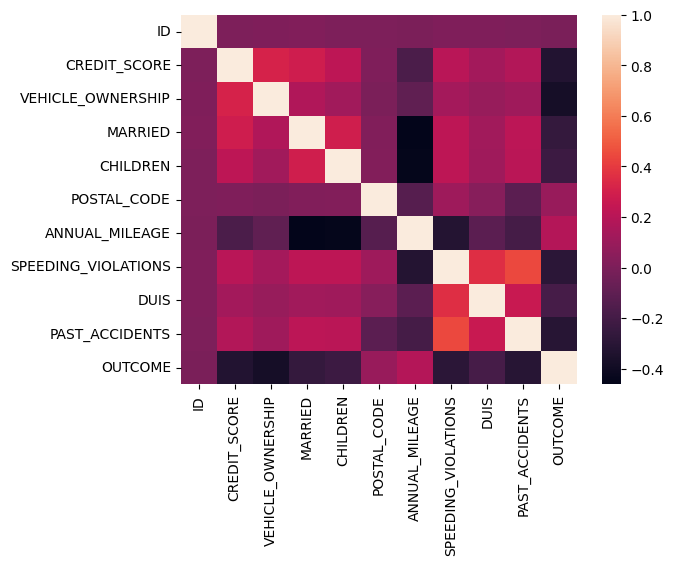

In [ ]:
df.corr
sns.heatmap(df.corr())

**DATA EXPLORATION**

In [ ]:
support=df.groupby("OUTCOME") ["OUTCOME"].count()
support

OUTCOME
0.0    6867
1.0    3133
Name: OUTCOME, dtype: int64

<Axes: xlabel='OUTCOME', ylabel='count'>

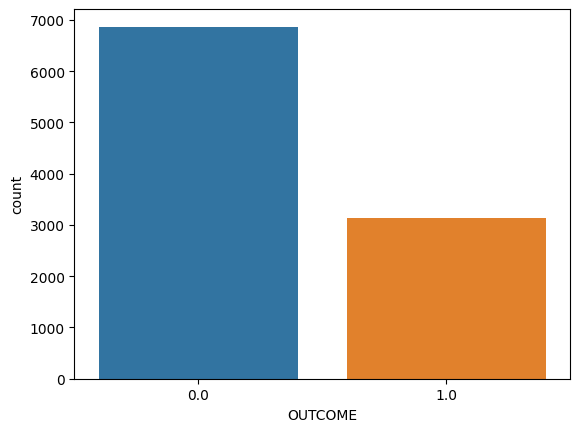

In [ ]:
sns.countplot(x="OUTCOME",data=df)

In [ ]:
dont_claim_loan = len(df[df.OUTCOME == 1])
claim_loan = len(df[df.OUTCOME ==0])
print("percentage of people who apply for a loan: {:.2f}%".format((dont_claim_loan / (len(df.OUTCOME))*100)))
print("percentage of people who did notapply for a loan: {:.2f}%".format((claim_loan / (len(df.OUTCOME))*100)))

percentage of people who apply for a loan: 31.33%
percentage of people who did notapply for a loan: 68.67%


**PLOTS TO ANALYZE THE DATA**

<Axes: xlabel='VEHICLE_TYPE', ylabel='count'>

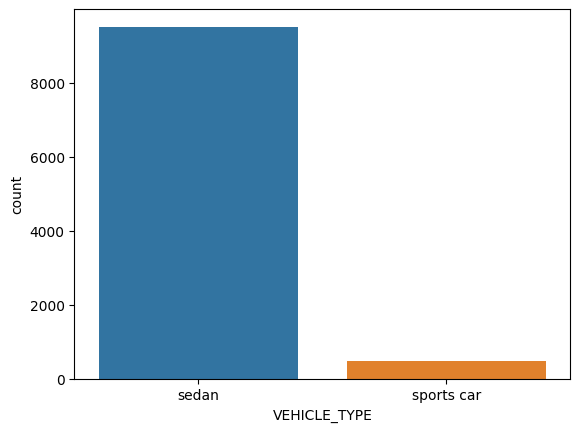

In [ ]:
sns.countplot(x = "VEHICLE_TYPE",data = df)

<Axes: xlabel='EDUCATION', ylabel='count'>

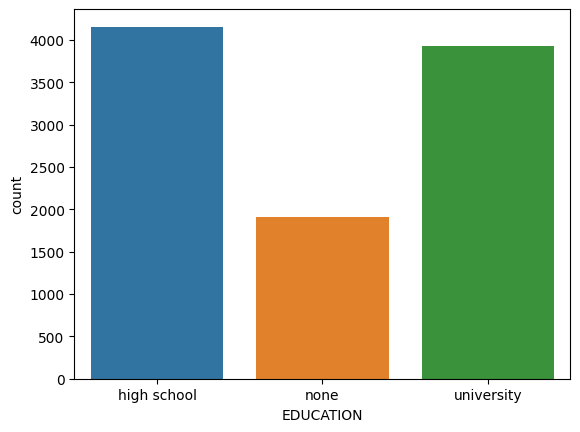

In [ ]:
sns.countplot(x = "EDUCATION",data = df)

<Axes: xlabel='MARRIED', ylabel='count'>

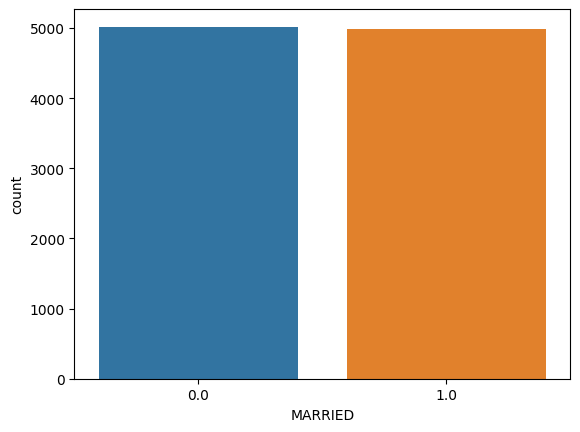

In [ ]:
sns.countplot(x = "MARRIED",data = df)

<Axes: xlabel='CHILDREN', ylabel='count'>

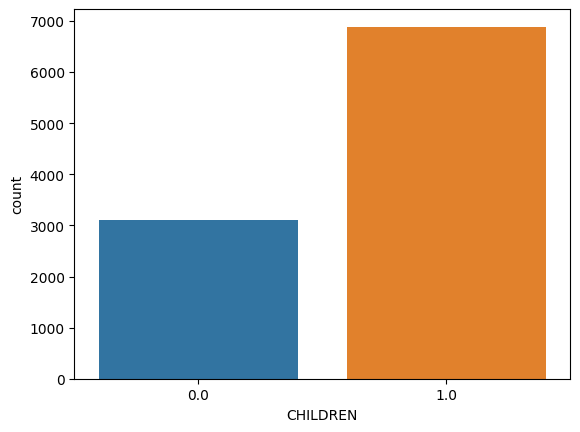

In [ ]:
sns.countplot(x = "CHILDREN",data = df)

array([[<Axes: title={'center': 'ID'}>,
        <Axes: title={'center': 'CREDIT_SCORE'}>,
        <Axes: title={'center': 'VEHICLE_OWNERSHIP'}>],
       [<Axes: title={'center': 'MARRIED'}>,
        <Axes: title={'center': 'CHILDREN'}>,
        <Axes: title={'center': 'POSTAL_CODE'}>],
       [<Axes: title={'center': 'ANNUAL_MILEAGE'}>,
        <Axes: title={'center': 'SPEEDING_VIOLATIONS'}>,
        <Axes: title={'center': 'DUIS'}>],
       [<Axes: title={'center': 'PAST_ACCIDENTS'}>,
        <Axes: title={'center': 'OUTCOME'}>, <Axes: >]], dtype=object)

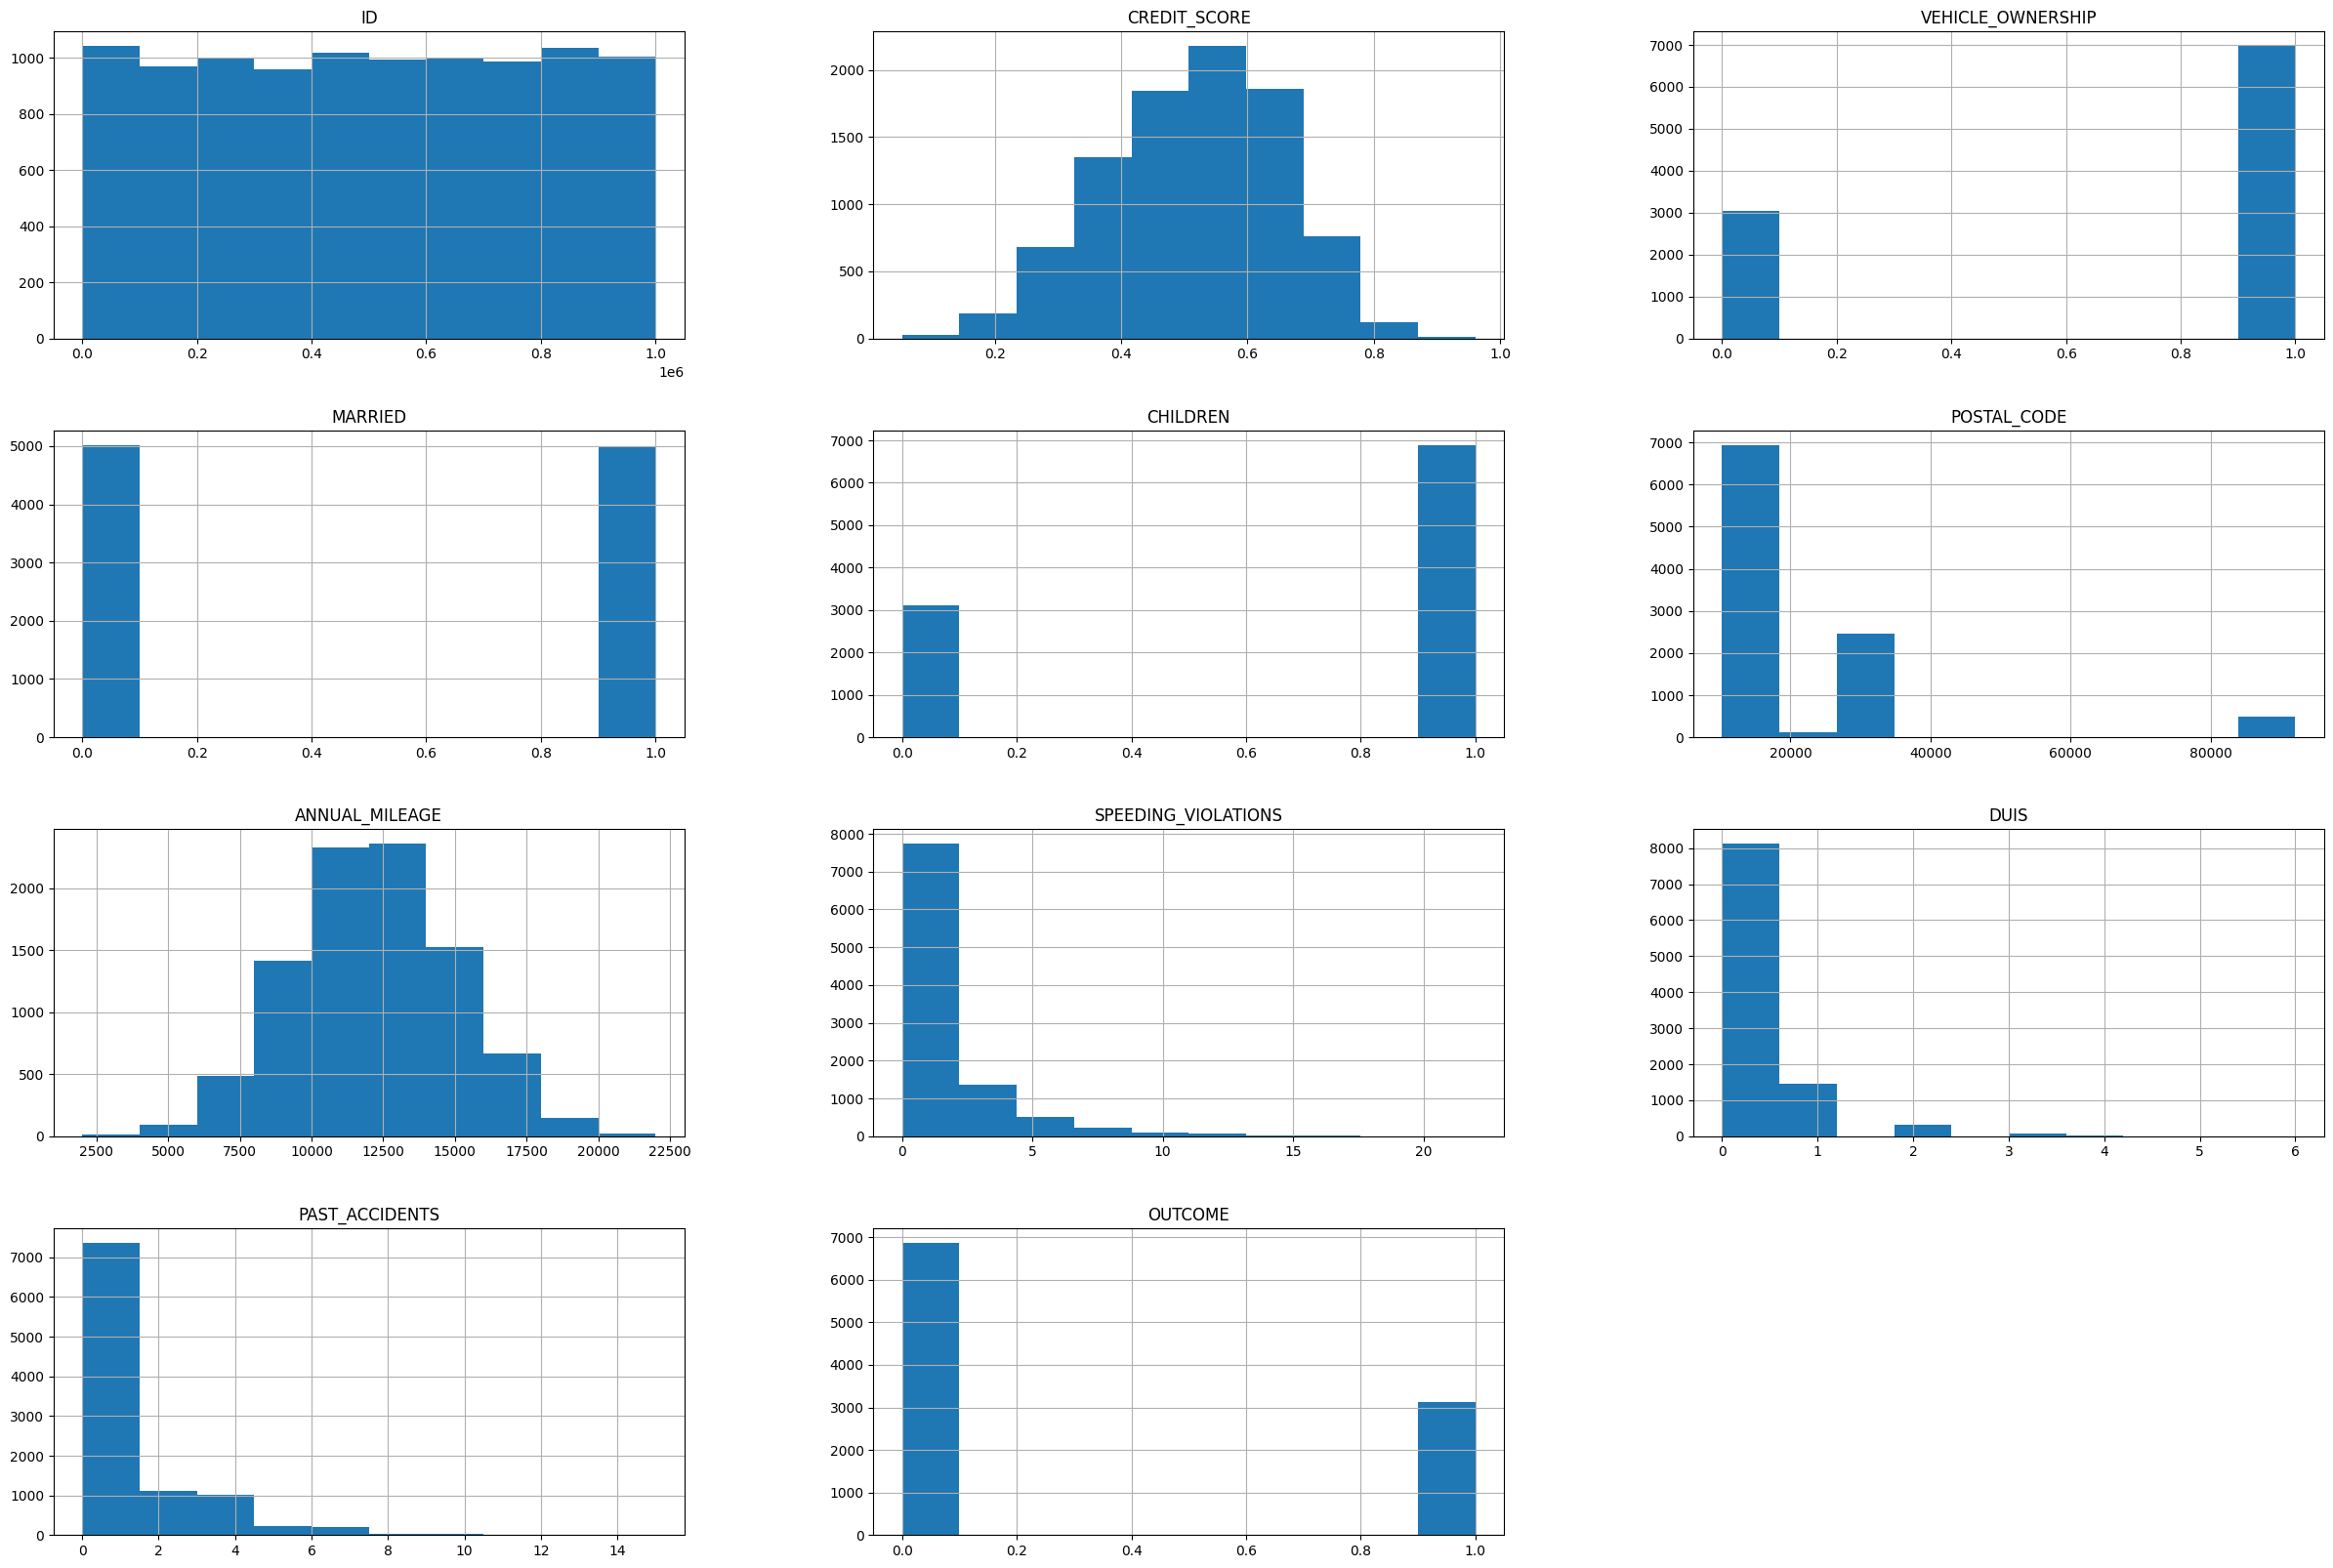

In [ ]:
df.hist(figsize=(30,20))

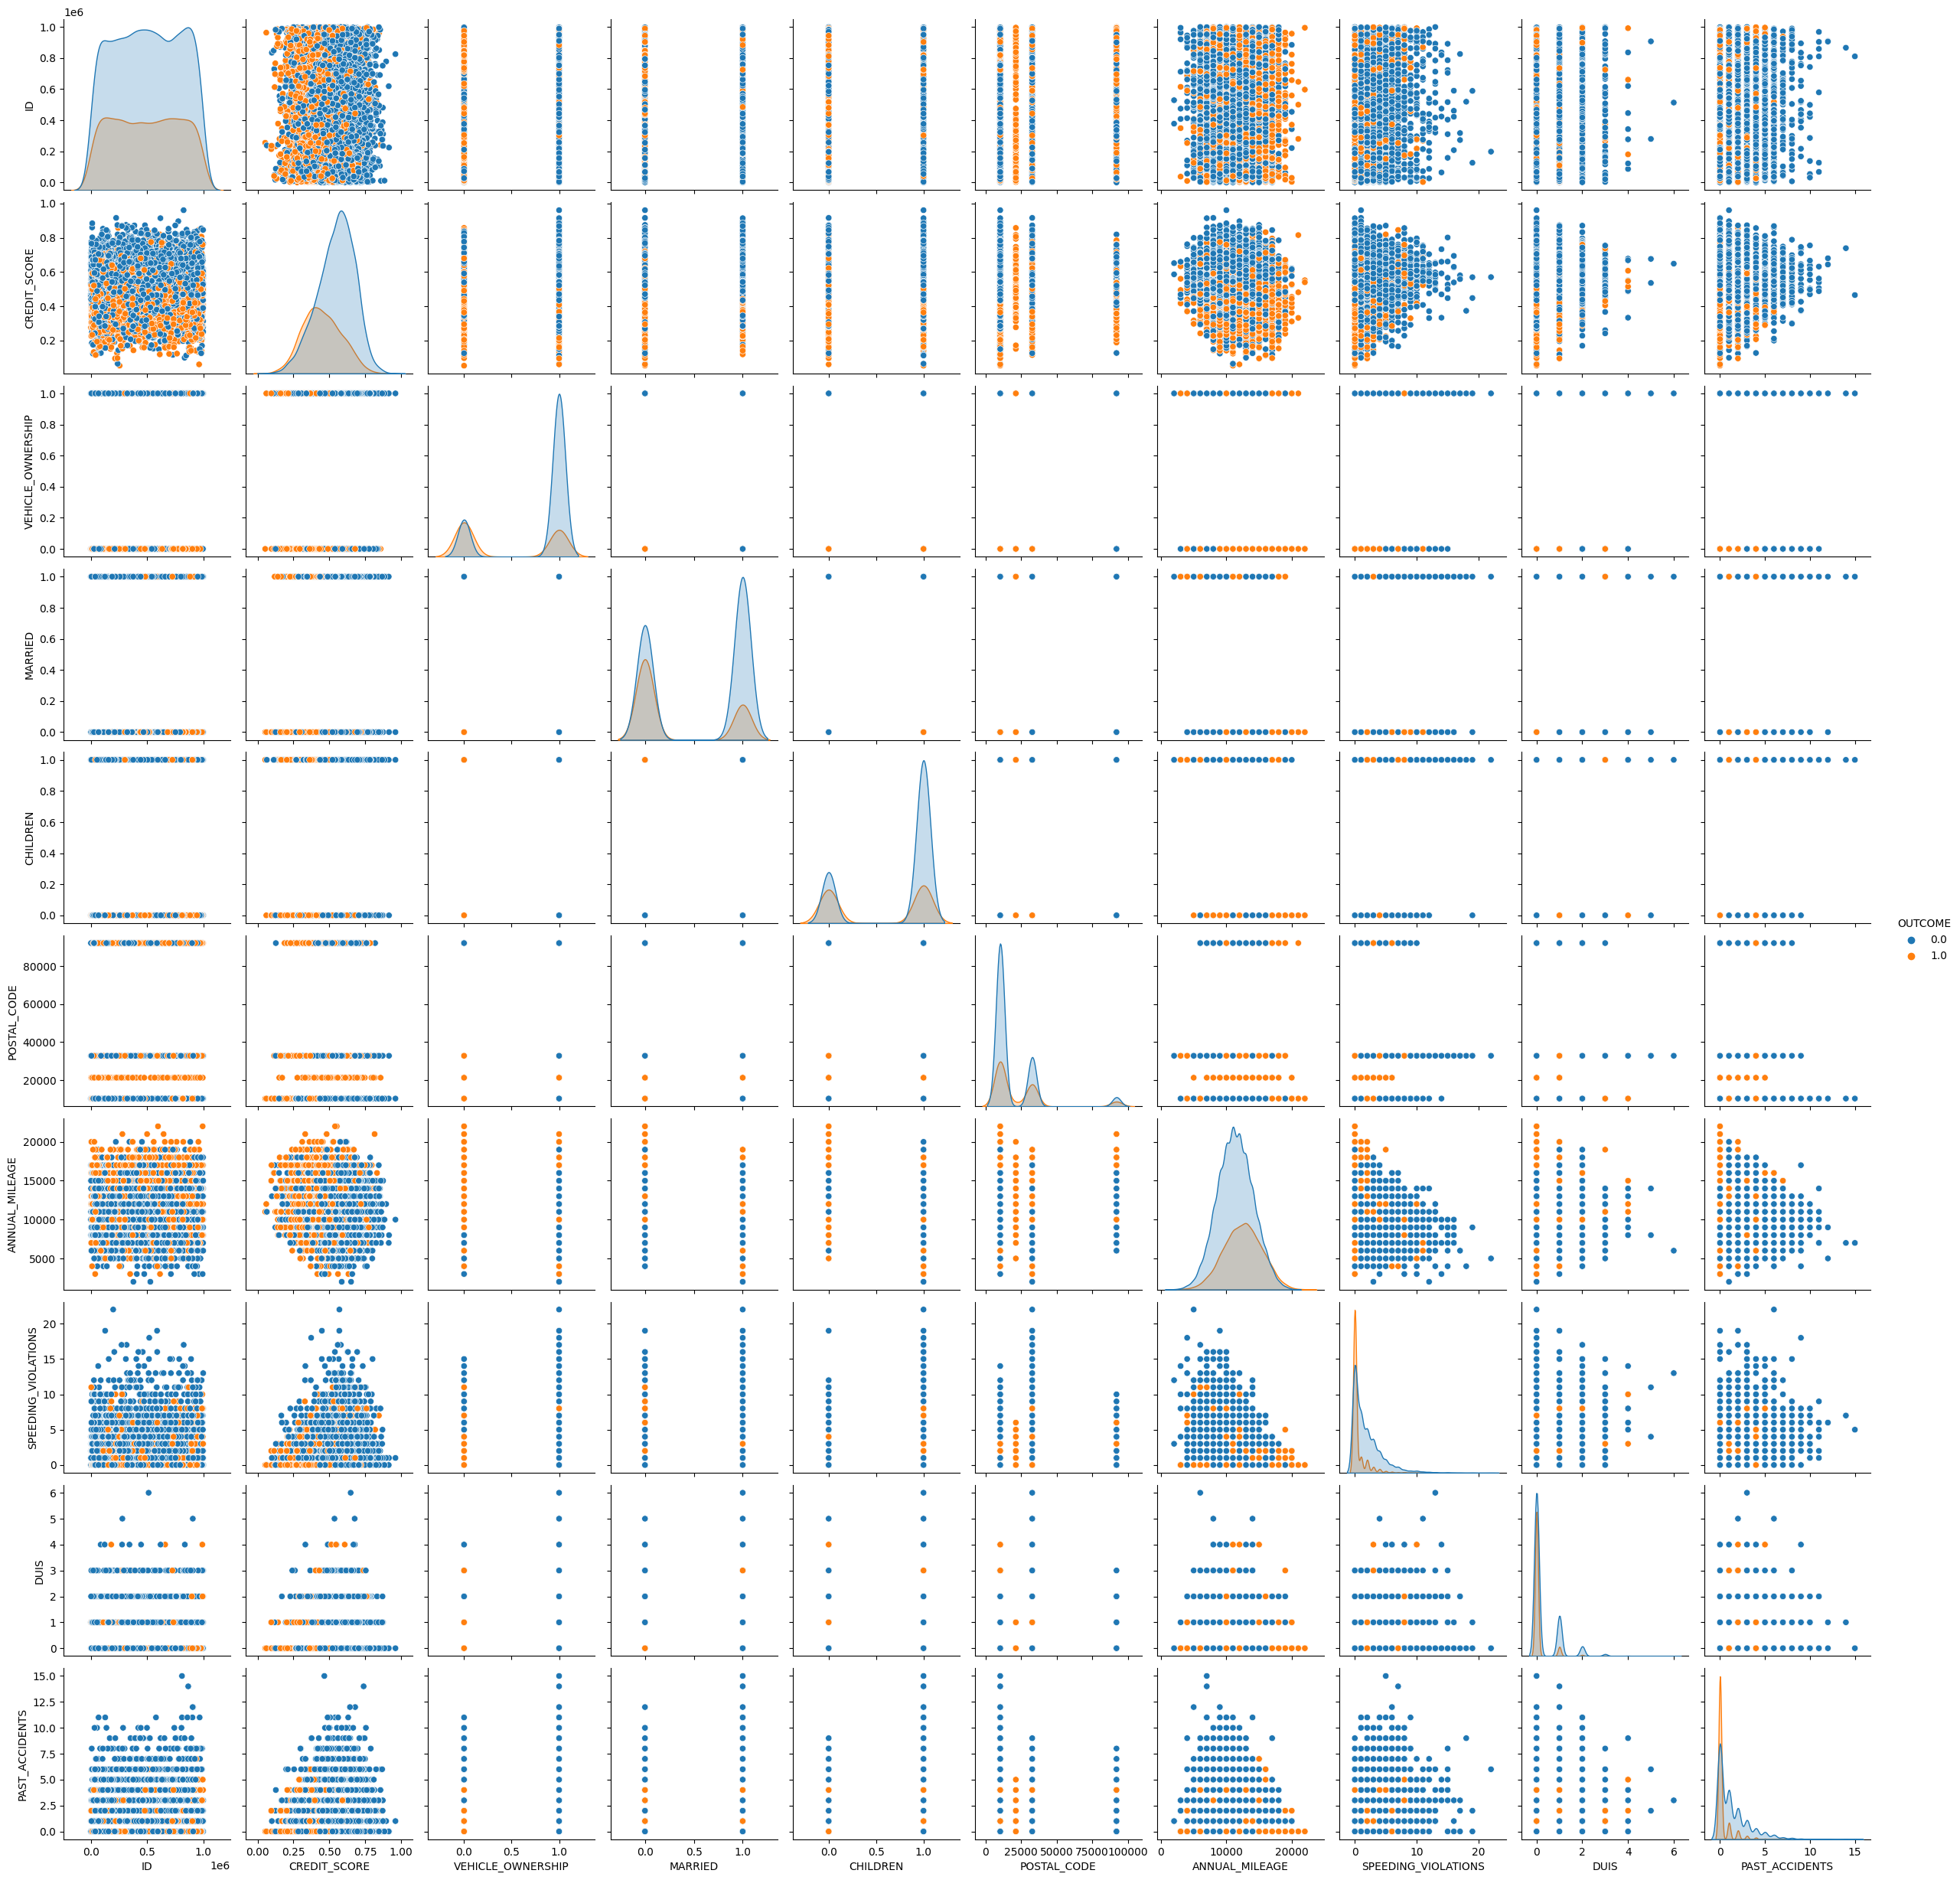

In [ ]:
sns.pairplot(df, hue="OUTCOME")

<Axes: xlabel='AGE'>

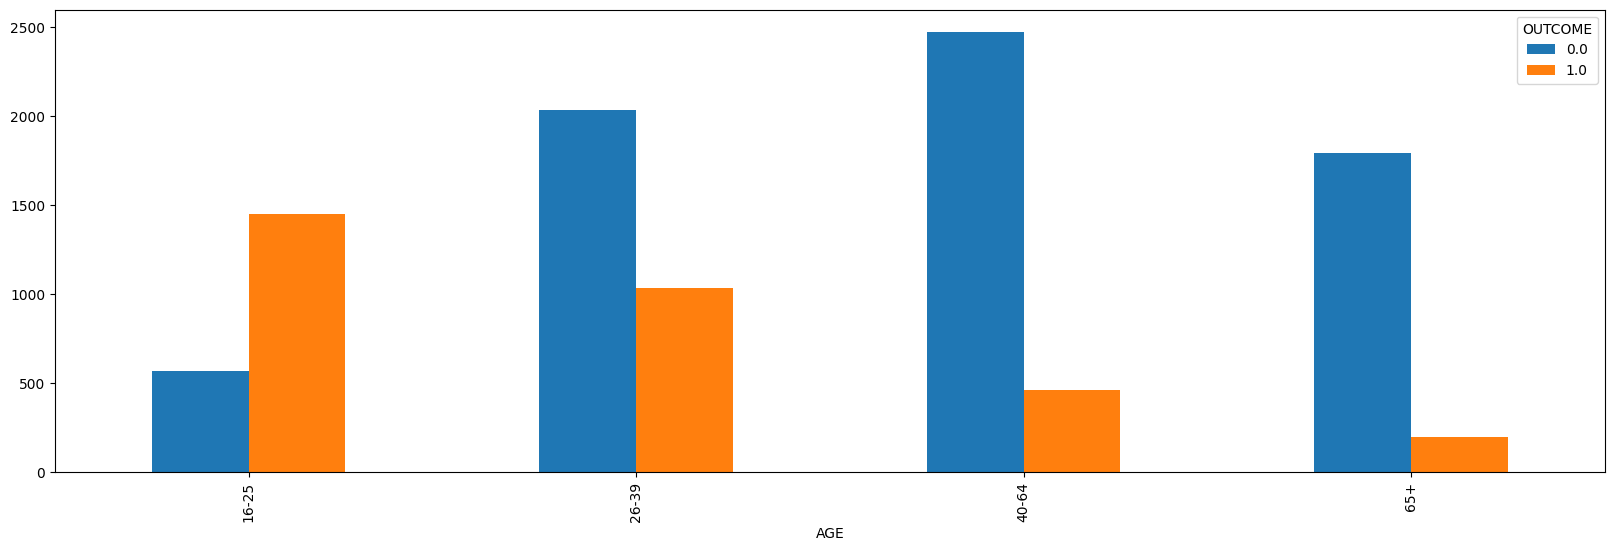

In [ ]:
pd.crosstab(df.AGE,df.OUTCOME).plot(kind="bar",figsize=(20,6))

In [ ]:
pd.crosstab(df["OUTCOME"],df["AGE"])

AGE,16-25,26-39,40-64,65+
OUTCOME,,,,
0.0,568,2031,2474,1794
1.0,1448,1032,457,196


<Axes: xlabel='GENDER'>

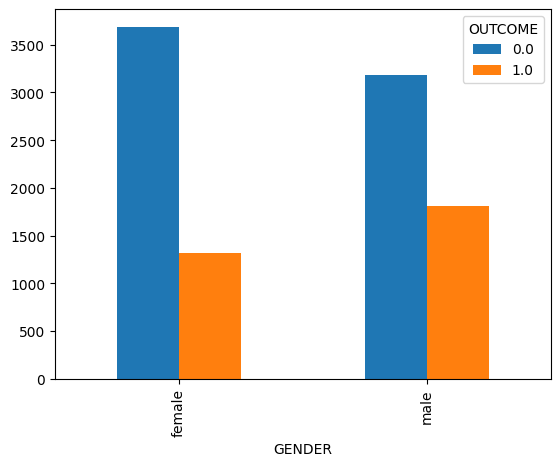

In [ ]:
pd.crosstab(df.GENDER,df.OUTCOME).plot(kind="bar")

In [ ]:
pd.crosstab(df["OUTCOME"],df["GENDER"])

GENDER,female,male
OUTCOME,,
0.0,3689,3178
1.0,1321,1812


<Axes: xlabel='INCOME'>

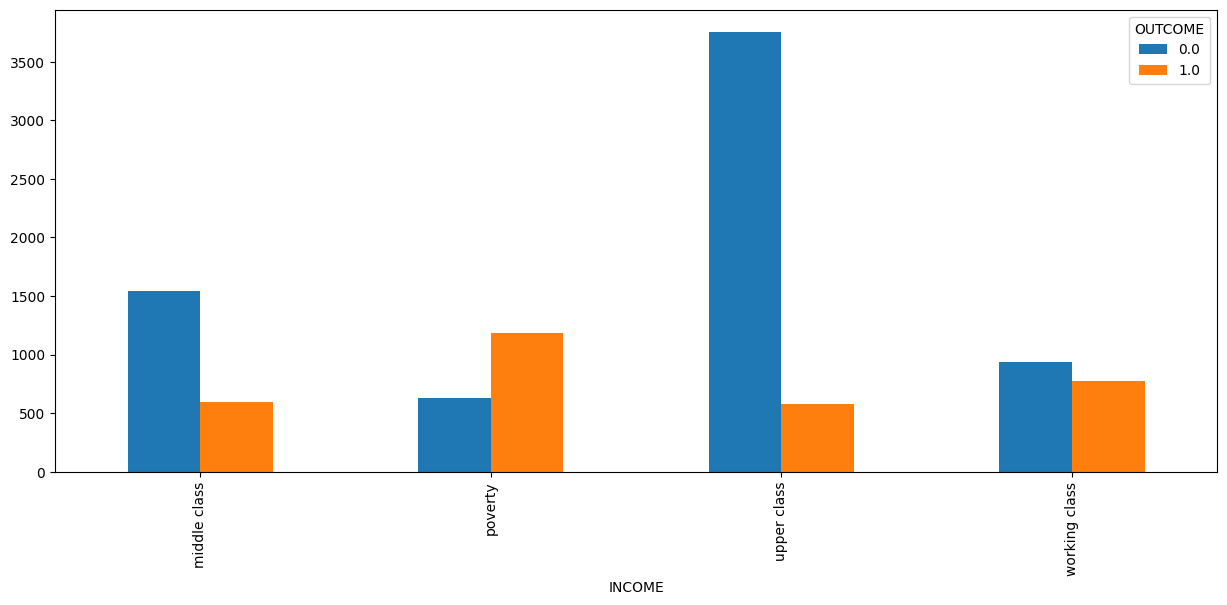

In [ ]:
pd.crosstab(df.INCOME,df.OUTCOME).plot(kind="bar",figsize=(15,6))

In [ ]:
pd.crosstab(df["OUTCOME"],df["INCOME"])

INCOME,middle class,poverty,upper class,working class
OUTCOME,,,,
0.0,1546,628,3757,936
1.0,592,1186,579,776


<Axes: xlabel='EDUCATION'>

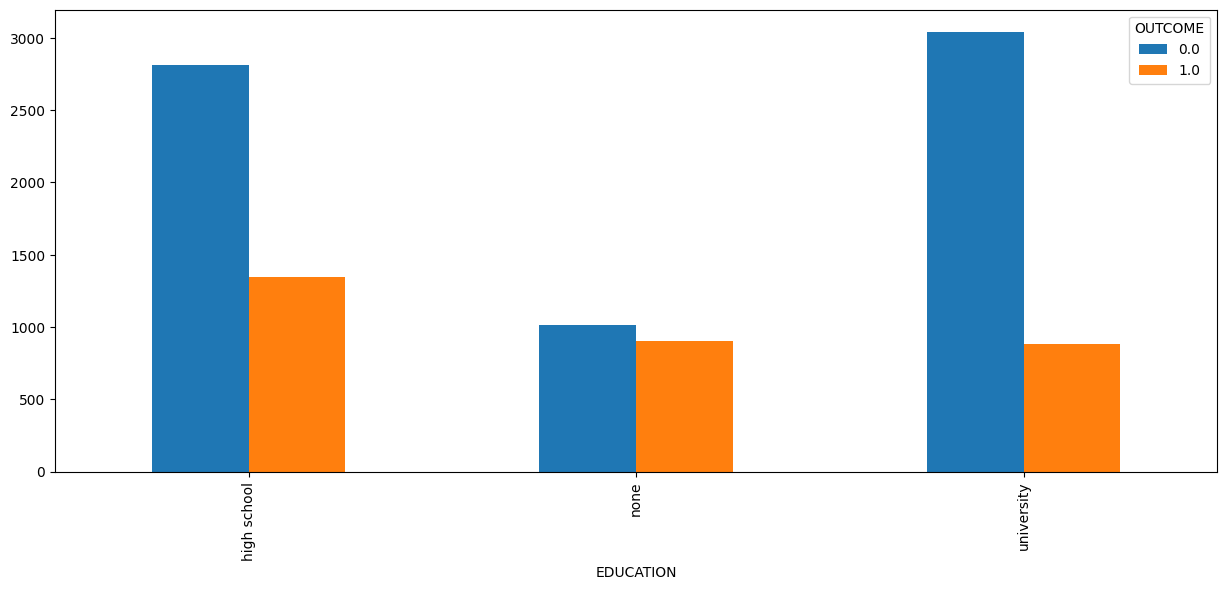

In [ ]:
pd.crosstab(df.EDUCATION,df.OUTCOME).plot(kind="bar",figsize=(15,6))

In [ ]:
pd.crosstab(df["OUTCOME"],df["EDUCATION"])

EDUCATION,high school,none,university
OUTCOME,,,
0.0,2813,1012,3042
1.0,1344,903,886


**DATA PREPROCESSING**

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isna().sum().sort_values(ascending=False)

CREDIT_SCORE           982
ANNUAL_MILEAGE         957
ID                       0
MARRIED                  0
PAST_ACCIDENTS           0
DUIS                     0
SPEEDING_VIOLATIONS      0
VEHICLE_TYPE             0
POSTAL_CODE              0
CHILDREN                 0
VEHICLE_YEAR             0
AGE                      0
VEHICLE_OWNERSHIP        0
INCOME                   0
EDUCATION                0
DRIVING_EXPERIENCE       0
RACE                     0
GENDER                   0
OUTCOME                  0
dtype: int64

Handling Missing Values

In [ ]:
df['CREDIT_SCORE']=df['CREDIT_SCORE'].fillna(df["CREDIT_SCORE"].mean())
df['ANNUAL_MILEAGE']=df['ANNUAL_MILEAGE'].fillna(df["ANNUAL_MILEAGE"].mean())

In [ ]:
df.isna().sum().sort_values(ascending=False)

ID                     0
MARRIED                0
PAST_ACCIDENTS         0
DUIS                   0
SPEEDING_VIOLATIONS    0
VEHICLE_TYPE           0
ANNUAL_MILEAGE         0
POSTAL_CODE            0
CHILDREN               0
VEHICLE_YEAR           0
AGE                    0
VEHICLE_OWNERSHIP      0
CREDIT_SCORE           0
INCOME                 0
EDUCATION              0
DRIVING_EXPERIENCE     0
RACE                   0
GENDER                 0
OUTCOME                0
dtype: int64

In [ ]:
df.dtypes

ID                       int64
AGE                     object
GENDER                  object
RACE                    object
DRIVING_EXPERIENCE      object
EDUCATION               object
INCOME                  object
CREDIT_SCORE           float64
VEHICLE_OWNERSHIP      float64
VEHICLE_YEAR            object
MARRIED                float64
CHILDREN               float64
POSTAL_CODE              int64
ANNUAL_MILEAGE         float64
VEHICLE_TYPE            object
SPEEDING_VIOLATIONS      int64
DUIS                     int64
PAST_ACCIDENTS           int64
OUTCOME                float64
dtype: object

Changing DataType

In [ ]:
dummy_data=pd.get_dummies(df[['AGE','RACE','GENDER','DRIVING_EXPERIENCE','EDUCATION','INCOME','VEHICLE_YEAR','VEHICLE_TYPE']],drop_first=True)
dummy_data

,AGE_26-39,AGE_40-64,AGE_65+,RACE_minority,GENDER_male,DRIVING_EXPERIENCE_10-19y,DRIVING_EXPERIENCE_20-29y,DRIVING_EXPERIENCE_30y+,EDUCATION_none,EDUCATION_university,INCOME_poverty,INCOME_upper class,INCOME_working class,VEHICLE_YEAR_before 2015,VEHICLE_TYPE_sports car
0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
3,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0
4,1,0,0,0,1,1,0,0,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1,0,0,0,0,1,0,0,0,1,0,1,0,1,0
9996,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0
9997,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0
9998,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0


APPEND

In [ ]:
df1=pd.concat([df,dummy_data],axis=1)
df1

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,...,DRIVING_EXPERIENCE_10-19y,DRIVING_EXPERIENCE_20-29y,DRIVING_EXPERIENCE_30y+,EDUCATION_none,EDUCATION_university,INCOME_poverty,INCOME_upper class,INCOME_working class,VEHICLE_YEAR_before 2015,VEHICLE_TYPE_sports car
0,569520,65+,female,majority,0-9y,high school,upper class,0.629027,1.0,after 2015,...,0,0,0,0,0,0,1,0,0,0
1,750365,16-25,male,majority,0-9y,none,poverty,0.357757,0.0,before 2015,...,0,0,0,1,0,1,0,0,1,0
2,199901,16-25,female,majority,0-9y,high school,working class,0.493146,1.0,before 2015,...,0,0,0,0,0,0,0,1,1,0
3,478866,16-25,male,majority,0-9y,university,working class,0.206013,1.0,before 2015,...,0,0,0,0,1,0,0,1,1,0
4,731664,26-39,male,majority,10-19y,none,working class,0.388366,1.0,before 2015,...,1,0,0,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,323164,26-39,female,majority,10-19y,university,upper class,0.582787,1.0,before 2015,...,1,0,0,0,1,0,1,0,1,0
9996,910346,26-39,female,majority,10-19y,none,middle class,0.522231,1.0,after 2015,...,1,0,0,1,0,0,0,0,0,0
9997,468409,26-39,male,majority,0-9y,high school,middle class,0.470940,1.0,before 2015,...,0,0,0,0,0,0,0,0,1,0
9998,903459,26-39,female,majority,10-19y,high school,poverty,0.364185,0.0,before 2015,...,1,0,0,0,0,1,0,0,1,0


In [ ]:
df2=df1.drop(['AGE','RACE','GENDER','DRIVING_EXPERIENCE','EDUCATION','INCOME','VEHICLE_YEAR','VEHICLE_TYPE'],axis=1)
df2

,ID,CREDIT_SCORE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,...,DRIVING_EXPERIENCE_10-19y,DRIVING_EXPERIENCE_20-29y,DRIVING_EXPERIENCE_30y+,EDUCATION_none,EDUCATION_university,INCOME_poverty,INCOME_upper class,INCOME_working class,VEHICLE_YEAR_before 2015,VEHICLE_TYPE_sports car
0,569520,0.629027,1.0,0.0,1.0,10238,12000.000000,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,750365,0.357757,0.0,0.0,0.0,10238,16000.000000,0,0,0,...,0,0,0,1,0,1,0,0,1,0
2,199901,0.493146,1.0,0.0,0.0,10238,11000.000000,0,0,0,...,0,0,0,0,0,0,0,1,1,0
3,478866,0.206013,1.0,0.0,1.0,32765,11000.000000,0,0,0,...,0,0,0,0,1,0,0,1,1,0
4,731664,0.388366,1.0,0.0,0.0,32765,12000.000000,2,0,1,...,1,0,0,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,323164,0.582787,1.0,0.0,0.0,10238,16000.000000,0,0,1,...,1,0,0,0,1,0,1,0,1,0
9996,910346,0.522231,1.0,0.0,1.0,32765,11697.003207,1,0,0,...,1,0,0,1,0,0,0,0,0,0
9997,468409,0.470940,1.0,0.0,1.0,10238,14000.000000,0,0,0,...,0,0,0,0,0,0,0,0,1,0
9998,903459,0.364185,0.0,0.0,1.0,10238,13000.000000,2,0,1,...,1,0,0,0,0,1,0,0,1,0


In [ ]:
df2.dtypes

ID                             int64
CREDIT_SCORE                 float64
VEHICLE_OWNERSHIP            float64
MARRIED                      float64
CHILDREN                     float64
POSTAL_CODE                    int64
ANNUAL_MILEAGE               float64
SPEEDING_VIOLATIONS            int64
DUIS                           int64
PAST_ACCIDENTS                 int64
OUTCOME                      float64
AGE_26-39                      uint8
AGE_40-64                      uint8
AGE_65+                        uint8
RACE_minority                  uint8
GENDER_male                    uint8
DRIVING_EXPERIENCE_10-19y      uint8
DRIVING_EXPERIENCE_20-29y      uint8
DRIVING_EXPERIENCE_30y+        uint8
EDUCATION_none                 uint8
EDUCATION_university           uint8
INCOME_poverty                 uint8
INCOME_upper class             uint8
INCOME_working class           uint8
VEHICLE_YEAR_before 2015       uint8
VEHICLE_TYPE_sports car        uint8
dtype: object

**SPLITTING DATA**

In [ ]:
x=df2.drop(["OUTCOME","ID"],axis=1)
y=df2["OUTCOME"]

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

**NORMALIZATION**

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train)
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)


**K NEAREST NEIGHBOUR ALGORITHM**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=9)
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)

In [ ]:
cls=KNeighborsClassifier()
params={'n_neighbors':[3,5,7,9],'weights':['uniform','distance']}
clf=GridSearchCV(cls,params,cv=10,scoring='accuracy')
clf.fit(x_train,y_train)
print(clf.best_params_)

{'n_neighbors': 9, 'weights': 'distance'}


Accuracy Score
0.813
Classificion Report
              precision    recall  f1-score   support

         0.0       0.85      0.88      0.87      1367
         1.0       0.73      0.66      0.69       633

    accuracy                           0.81      2000
   macro avg       0.79      0.77      0.78      2000
weighted avg       0.81      0.81      0.81      2000

confusion_matrix


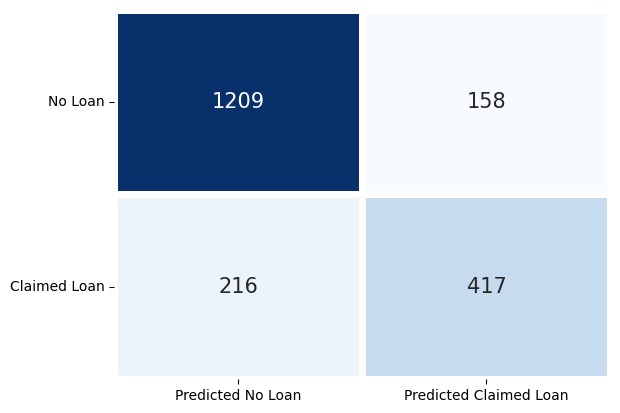

In [ ]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,ConfusionMatrixDisplay
score=accuracy_score(y_test,y_pred)
print('Accuracy Score')
print(score)
report=classification_report(y_test,y_pred)
print('Classificion Report')
print(report)


matrix=confusion_matrix(y_test,y_pred)
print('confusion_matrix')
sns.heatmap(matrix, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            yticklabels = ['No Loan', 'Claimed Loan'], xticklabels = ['Predicted No Loan', 'Predicted Claimed Loan'])
plt.yticks(rotation = 0)
plt.show()

**NAIVE BAYES ALGORITHM**

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(x_train,y_train)
y_pred=gnb.predict(x_test)
y_pred

array([1., 0., 1., ..., 0., 1., 1.])

Accuracy Score
0.7405
Classificion Report
              precision    recall  f1-score   support

         0.0       0.89      0.71      0.79      1367
         1.0       0.56      0.81      0.66       633

    accuracy                           0.74      2000
   macro avg       0.73      0.76      0.73      2000
weighted avg       0.79      0.74      0.75      2000

confusion_matrix


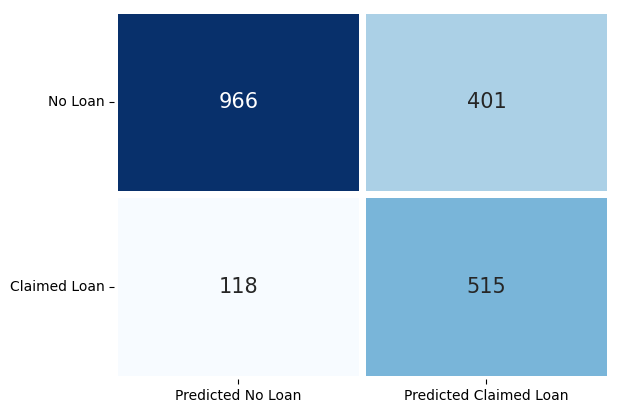

In [ ]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,ConfusionMatrixDisplay
score=accuracy_score(y_test,y_pred)
print('Accuracy Score')
print(score)
report=classification_report(y_test,y_pred)
print('Classificion Report')
print(report)


matrix=confusion_matrix(y_test,y_pred)
print('confusion_matrix')
sns.heatmap(matrix, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            yticklabels = ['No Loan', 'Claimed Loan'], xticklabels = ['Predicted No Loan', 'Predicted Claimed Loan'])
plt.yticks(rotation = 0)
plt.show()

**SUPPORT VECTOR MACHINE ALGORITHM**

In [ ]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(x_train,y_train)
y_pred=svc.predict(x_test)
y_pred

array([1., 0., 1., ..., 0., 0., 0.])

Accuracy Score
0.8415
Classificion Report
              precision    recall  f1-score   support

         0.0       0.88      0.90      0.89      1367
         1.0       0.76      0.73      0.74       633

    accuracy                           0.84      2000
   macro avg       0.82      0.81      0.81      2000
weighted avg       0.84      0.84      0.84      2000

confusion_matrix


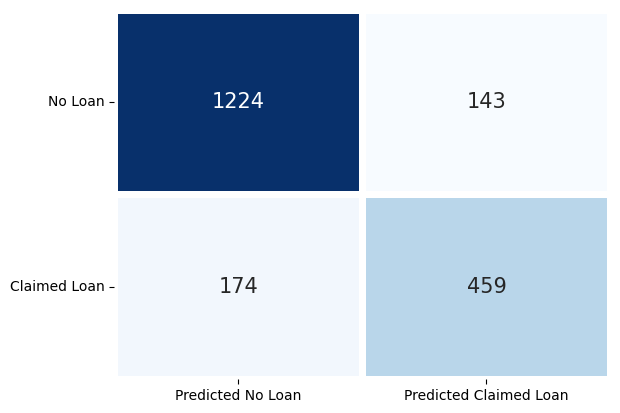

In [ ]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,ConfusionMatrixDisplay
score=accuracy_score(y_test,y_pred)
print('Accuracy Score')
print(score)
report=classification_report(y_test,y_pred)
print('Classificion Report')
print(report)


matrix=confusion_matrix(y_test,y_pred)
print('confusion_matrix')
sns.heatmap(matrix, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            yticklabels = ['No Loan', 'Claimed Loan'], xticklabels = ['Predicted No Loan', 'Predicted Claimed Loan'])
plt.yticks(rotation = 0)
plt.show()

**DECISION TREE ALGORITHM**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier(criterion="entropy")
tree.fit(x_train,y_train)
y_pred=tree.predict(x_test)
y_pred

array([1., 0., 1., ..., 0., 0., 0.])

Accuracy Score
0.7835
Classificion Report
              precision    recall  f1-score   support

         0.0       0.84      0.85      0.84      1367
         1.0       0.66      0.64      0.65       633

    accuracy                           0.78      2000
   macro avg       0.75      0.74      0.75      2000
weighted avg       0.78      0.78      0.78      2000

confusion_matrix


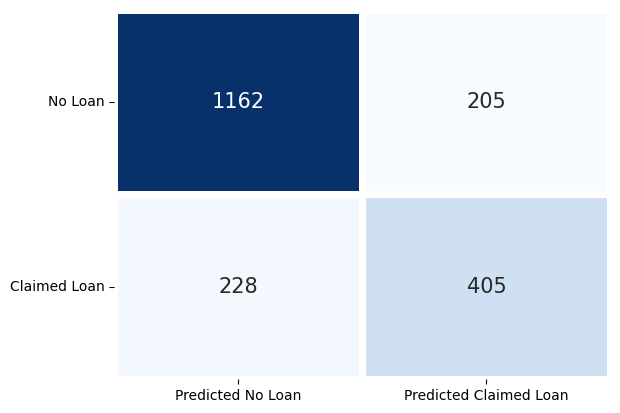

In [ ]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,ConfusionMatrixDisplay
score=accuracy_score(y_test,y_pred)
print('Accuracy Score')
print(score)
report=classification_report(y_test,y_pred)
print('Classificion Report')
print(report)


matrix=confusion_matrix(y_test,y_pred)
print('confusion_matrix')
sns.heatmap(matrix, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            yticklabels = ['No Loan', 'Claimed Loan'], xticklabels = ['Predicted No Loan', 'Predicted Claimed Loan'])
plt.yticks(rotation = 0)
plt.show()

**RANDOM FOREST ALGORITHM**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
forest=RandomForestClassifier(n_estimators=10,criterion='entropy')
forest.fit(x_train,y_train)
y_pred=forest.predict(x_test)
y_pred

array([1., 0., 1., ..., 0., 0., 0.])

Accuracy Score
0.812
Classificion Report
              precision    recall  f1-score   support

         0.0       0.83      0.91      0.87      1367
         1.0       0.76      0.60      0.67       633

    accuracy                           0.81      2000
   macro avg       0.79      0.76      0.77      2000
weighted avg       0.81      0.81      0.81      2000

confusion_matrix


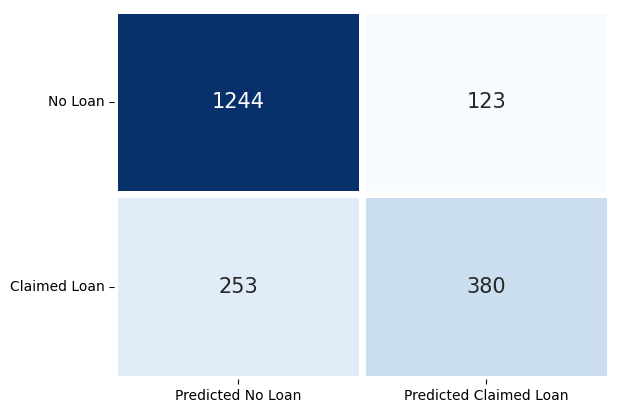

In [ ]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,ConfusionMatrixDisplay
score=accuracy_score(y_test,y_pred)
print('Accuracy Score')
print(score)
report=classification_report(y_test,y_pred)
print('Classificion Report')
print(report)


matrix=confusion_matrix(y_test,y_pred)
print('confusion_matrix')
sns.heatmap(matrix, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            yticklabels = ['No Loan', 'Claimed Loan'], xticklabels = ['Predicted No Loan', 'Predicted Claimed Loan'])
plt.yticks(rotation = 0)
plt.show()